## 1. Keras 훑어보기

### 1) 전처리 (Preprocessing)

#### Tokenizer
토큰화, 정수 인코딩에 사용

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
t = Tokenizer()
fit_text='The earth is an awesome place live'
t.fit_on_texts([fit_text])

test_text = 'The earth is an great place live'
sequences = t.texts_to_sequences([test_text])[0]

print('sequences: ', sequences) # great는 단어 집합에 없어서 출력 x
print('word_index: ', t.word_index) # 단어집합

sequences:  [1, 2, 3, 4, 6, 7]
word_index:  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


#### pad_sequence()
모든 샘플의 길이를 동일하게 맞춰야 할 때 사용     
정해진 기리보다 길면 자르고 짧으면 빈 값을 0으로 채운다.

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1,2,3],[3,4,5,6],[7,8]], maxlen=3, padding='pre') # pre: 앞을 채움 / post: 뒤를 채움

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

### 2) 워드 임베딩(Word Embedding)
텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것      
- 밀집 벡터: 대부분의 값이 실수이고 원핫인코딩에 비해 상대적으로 저차원!     
              
              
|-|One-hot Vector|Embedding Vector|
|---|---|---|
|차원|고차원(단어 집합의 크기만큼)|저차원|
|다른 표현|sparse vector의 일종|dense vector의 일종|
|표현 방법|수동|훈련 데이터로부터 학습|
|값의 타입|1 또는 0|실수|           
                 
    - 워드 임베딩 과정을 통해 얻어진다
    - 주로 256, 512, 1024 등의 차원
    - 초기값은 랜덤 -> 인공 신경망같이 학습되면서 변경됨.
                  
- Embedding(): 단어를 밀집 벡터로 만드는 역할.       
정수 인코딩이 된 단어들을 받아서 임베딩을 수행한다.       
(number of samples, input_length)인 2D 정수 텐서를 입력으로 받음 => (number of samples, input_length, embedding word dimensionality)인 3D텐서를 return      
Ex)        
```python
Embedding(7,2,input_length=5)      
```
    - 7: 단어 집합의 크기
    - 2: 임베딩한 후 벡터의 크기
    - 5: 각 입력 시퀀스의 길이

### 3) 모델링(Modeling)

#### Sequential()
입력층, 은닉층, 출력층, 임베딩 층 등의 층을 구성하기 위해 사용.             
Sequential()로 모델 선언 뒤 model.add()로 층을 단계적으로 추가한다.      
```python
from tensorflow.keras.models. import Sequential
model = Sequential()
model.add(추가할 층)
model.add(추가할 층)
model.add(추가할 층)
```

#### Dense()
fully connected layer를 추가. -> model.add()를 이용       
                
Ex1)
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu')
```
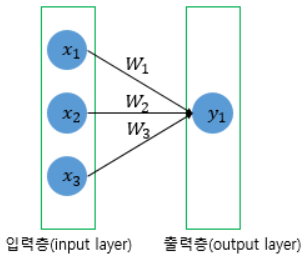
Dense의 인자들        
- 첫번째 인자: 출력 뉴런의 수
- input_dim: 입력 차원
- activation: 활성화 함수
    - linear: 디폴트값. 활성화함수 없이 가중치 계산 결과 출력
    - sigmoid: 이진분류에 사용
    - softmax: 다중 클래스 분류 문제에서 주로 사용
    - relu: 은닉층에 주로 사용
                      
                      
Ex2) Dense()를 두번 사용: 첫번째 dense 층이 은닉층이 됨. 
```python
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```
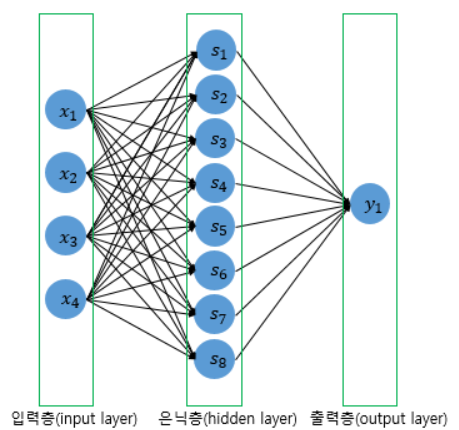

#### summary()
모델의 정보를 요약

### 4) Compile, Training

#### compile()
모델을 기계가 이해할 수 있도록 컴파일함. 오차 함수, 최적화 방법, 메트릭 함수를 선택할 수 있다          
Ex) RNN 모델 compile
```python
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
```
- optimizer: 'rmsprop', 'adam', 'sgd' 등
- loss: 손실함수
- metrics: 훈련을 모니터링 하기 위한 지표
                 
대표적인 손실 함수와 활성화 함수 조합           
                   
|문제유형|손실 함수명|출력층의 활성화함수|
|---|---|---|
|회귀문제|mean_squared_error(평균 제곱 오차)|-|
|다중클래스분류|categorical_crossentrop(원핫 인코딩 상태일때))|소프트맥스|
|다중클래스분류|sparse_categorical_crossentropy(정수 인코딩 상태에서 수행가능)|소프트맥스|
|이진분류|binary_crossentropy|시그모이드|

#### fit
모델 학습
```python
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))
```
- epoch: 총 훈련횟수
- batch_size: 배치 크기. default:32 / 미니배치 경사하강법을 안쓸 때는 None
- validation_split: 별도로 validation set을 사용 안하고, train에서 일정 비율을 분리해서 검증 데이터로 사용함.
- verbose: 학습 중 출력되는 문구. 
    - 0: 아무것도 출력 x
    - 1: 진행 막대로 훈련의 진행도를 볼 수 있음.
    - 2: 미니배치마다 손실 정보를 출력

### 5) 평가와 예측

#### evaluate()
학습한 모델의 정확도를 평가
```python
model.evaluate(X_text, y_text, batch_size=32)
```
             
#### predict()
임의의 입력에 대한 모델의 출력값 확인
```python
model.predict(X_input, batch_size=32)
```

### 6) 모델 저장, 로드

#### save()
인공신경망 모델을 hdf5 파일에 저장
```python
model.save('model_name.h5')
```
            
#### load_model()
저장해둔 모델을 불러옴
```python
from tensorflow.keras.models import load_model
model = load.model("model_name.h5")
```

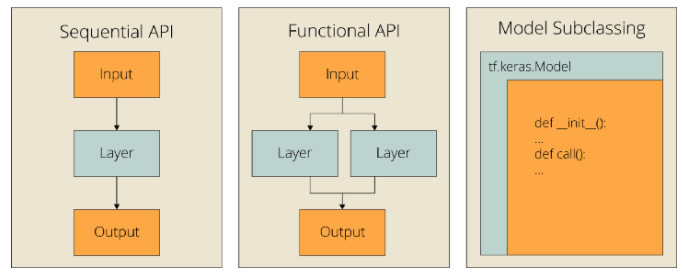

## 2. 케라스의 함수형 API (Keras Functional API)
복잡한 모델을 생성할 때 sequential API보다 주로 사용하는 functional API     
자세한 소개: https://keras.io/getting-started/functional-api-guide/

### 1) sequential API로 만든 기본적인 모델
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
```
: 직관적이고 편리하지만 단순히 층을 쌓는 것만으로 구현할 수 없는 복잡한 신경망 구현 불가.

### 2) Functional API로 만든 모델
각 층을 일종의 함수(function)로서 정의하고, 각 함수를 조합하기 위한 연산자를 제공 -> 이를 이용하여 신경망을 설계한다.

#### (1) 전결합 피드 포워드 신경망(Fully-connected FFNN)
예) 입력 차원이 1인 fully-connected feed forward neural net
```python
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

inputs = Input(shape=(10,))  # 입력텐서 - Input 함수에 입력의 크기 정의
hidden1 = Dense(64, activation='relu')(inputs) # 이전층이 다음층 함수의 입력으로 사용됨
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output) # 입력과 출력을 정의

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(data, labels)
```

#### (2) 선형 회귀(Linear Regression)
```python
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
linear_model.fit(X, y, batch_size=1, epochs=300, shuffle=False)
```

#### (3) 로지스틱 회귀(Logistic Regression)
```python
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)
```

#### (4) multiple inputs 모델
```python
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)
```

#### (5) RNN 은닉층 사용
하나의 feature에 50개의 시점(time-step)을 입력으로 받는 모델
```python
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs) # RNN의 일종인 LSTM을 사용
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=output)
```

#### (6) 다르게 보이지만 동일한표기
```python
encoder = Dense(128)(input)
```
이 코드는 밑의 코드처럼 두줄로 표현할 수 있음!
```python
encoder = Dense(128)
encoder(input)
```

## 3. 케라스 서브클래싱 API (Keras Subclassing API)
- Functional API로도 구현할 수 없는 복잡한 모델들을 구현할 수 있음. (예: 재귀 네트워크, 트리 RNN)
- 객체 지향 프로그래밍에 익숙해야 해서 코드 사용이 까다로움.
- class 형태의 모델
```python
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred
```
    - tf.keras.Model을 상속받음
    - init()에서 모델의 생성자를 정의함
    - super(): 여기서 만든 클래스는 tf.keras.Model 클래스의 속성들을 가지고 초기화된다.
    - call() 함수: 모델이 데이터를 입력받아 예측값을 리턴하느 포워드 연산을 진행시킴.